##  import  package and define some  auxiliary function

In [3]:
# Import packages and load the data
import numpy as np
import numpy.random as rnd
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')
# This next command is specifically for Jupyter Notebook
%matplotlib notebook


In [125]:
def data_moments(xvals):
    '''
    --------------------------------------------------------------------
    This function computes the two data moments for SMM
    (mean(data), variance(data)) from both the actual data and from the
    simulated data.
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N, S) matrix, (N,) vector, or scalar in (cut_lb, cut_ub),
            test scores data, either real world or simulated. Real world
            data will come in the form (N,). Simulated data comes in the
            form (N,) or (N, S).
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data = scalar or (S,) vector, mean value of test scores data
    var_data  = scalar > 0 or (S,) vector, variance of test scores data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: mean_data, var_data
    --------------------------------------------------------------------
    '''
    if xvals.ndim == 1:
        mean_data = xvals.mean()
        std_data = xvals.std()
    elif xvals.ndim == 2:
        mean_data = xvals.mean(axis=0)
        std_data = xvals.std(axis=0)
    
    return mean_data, std_data

In [135]:
def err_vec(data_vals, sim_vals, simple):
    '''
    --------------------------------------------------------------------
    This function computes the vector of moment errors (in percent
    deviation from the data moment vector) for SMM.
    --------------------------------------------------------------------
    INPUTS:
    data_vals = (N,) vector, test scores data
    sim_vals  = (N, S) matrix, S simulations of test scores data
    mu        = scalar, mean of the nontruncated normal distribution
                from which the truncated normal is derived
    sigma     = scalar > 0, standard deviation of the nontruncated
                normal distribution from which the truncated normal is
                derived
    simple    = boolean, =True if errors are simple difference, =False
                if errors are percent deviation from data moments
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        data_moments()
        
    OBJECTS CREATED WITHIN FUNCTION:
    mean_data  = scalar, mean value of data
    var_data   = scalar > 0, variance of data
    moms_data  = (2, 1) matrix, column vector of two data moments
    mean_model = scalar, estimated mean value from model
    var_model  = scalar > 0, estimated variance from model
    moms_model = (2, 1) matrix, column vector of two model moments
    err_vec    = (2, 1) matrix, column vector of two moment error
                 functions
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: err_vec
    --------------------------------------------------------------------
    '''
    mean_data, std_data = data_moments(data_vals)
    moms_data = np.array([[mean_data], [std_data]])
    
    mean_sim, std_sim = data_moments(sim_vals)
    mean_model = mean_sim.mean()
    std_model = std_sim.mean()
    moms_model = np.array([[mean_model], [std_model]])
    
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec


def criterion(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the SMM weighted sum of squared moment errors
    criterion function value given parameter values and an estimate of
    the weighting matrix.
    --------------------------------------------------------------------
    INPUTS:
    params    = (2,) vector, ([mu, sigma])
    mu        = scalar, mean of the normally distributed random variable
    sigma     = scalar > 0, standard deviation of the normally
                distributed random variable
    args      = length 3 tuple,
                (xvals, unif_vals, W_hat)
    xvals     = (N,) vector or (N, S) matrix, values of the lognormally
                distributed random variable
    W_hat     = (R, R) matrix, estimate of optimal weighting matrix
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        sts.lognorm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    err        = (2, 1) matrix, column vector of two moment error
                 functions
    crit_val   = scalar > 0, GMM criterion function value
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: crit_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    np.random.seed(1234)
    sim_vals = np.exp(np.random.normal(mu, sigma, ((N, S))))
    xvals,  W_hat = args
    err = err_vec(xvals, sim_vals, simple=False)
    crit_val = np.dot(np.dot(err.T, W_hat), err) 
    
    return crit_val

# a

In [85]:
incomes = np.loadtxt('./incomes.txt')

<IPython.core.display.Javascript object>


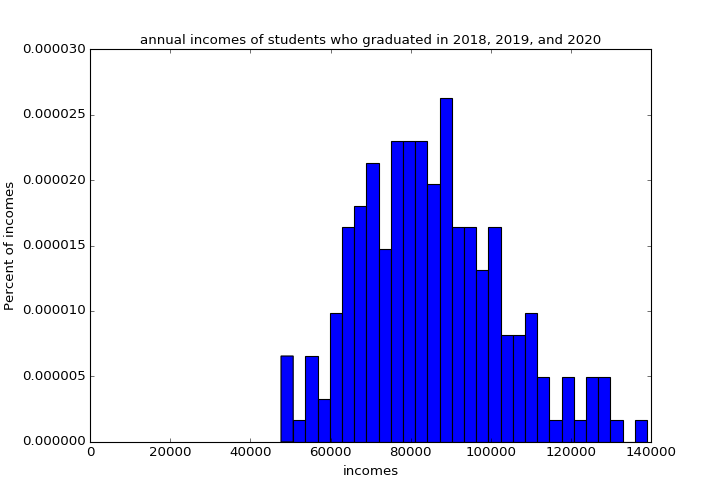

In [192]:
# Plot the histogram of the data
%matplotlib notebook
count, bins, ignored = plt.hist(incomes, 30, normed=True)
plt.title('annual incomes of students who graduated in 2018, 2019, and 2020', fontsize=12)
plt.xlabel('incomes')
plt.ylabel('Percent of incomes')
plt.xlim([0, 140000])  # This gives the xmin and xmax to be plotted"
plt.show()

# b

In [177]:
# Define function that gives PDF values from truncated lognormal distribution
def LN_pdf(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    Generate PDF values from a lognormal distribution based on a
    lognormal distribution with mean mu and standard deviation sigma.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N, S) matrix, (N,) vector value(s) in the support of s~TN(mu, sig)
    mu     = scalar, mean of the lognormal distribution from
             which the truncated lognormal is derived
    sigma  = scalar > 0, standard deviation of the lognormal
             distribution from which the lognormal is derived
             
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        scipy.stats.lognorm()
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals   = (N, S) matrix, (N,) vector, or scalar in (0,1), PDF
                 values corresponding to xvals from truncated lognormal PDF
                 with base lognormal distribution N(mu, sigma)
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    if xvals.ndim == 1:
        pdf_vals  = (1/(xvals * sigma * np.sqrt(2 * np.pi))) * np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2))
    elif xvals.ndim == 2:
        pdf_val = lambda x : (1/(x * sigma * np.sqrt(2 * np.pi))) * np.exp( - (np.log(x) - mu)**2 / (2 * sigma**2))
        pdf_vals = np.apply_along_axis(pdf_val, axis = 1, arr = xvals)

    return pdf_vals
    
  

answer

In [156]:
x_vals = np.array([[200.0, 270.0], [180.0, 195.5]])
mu = 5.0
sigma = 1.0
print ("Input the matrix xvals with given the paraments mu and sigma, we can get")
print (LN_pdf(x_vals, mu, sigma))

Input the matrix xvals with given the paraments mu and sigma, we can get
[[ 0.0019079   0.00123533]
 [ 0.00217547  0.0019646 ]]


# c

In [162]:
N = 200
S = 300
mu_init_C = 11
sig_init_C = 0.1

params_init_C = np.array([mu_init_C, sig_init_C])
W_hat_C = np.eye(2)

smm_args_C = (incomes, W_hat_C)
results_C = opt.minimize(criterion, params_init_C, args=(smm_args_C), bounds=((None, None), (1e-20, None)),  method='L-BFGS-B')
mu_SMM_C, sig_SMM_C = results_C.x

answer

In [194]:
#np.random.seed(1234)
sim_vals = np.exp(np.random.normal(mu_SMM_C, sig_SMM_C, ((N, S))))
mean_data, std_data= data_moments(incomes)
mean_model_, std_model_ = data_moments(sim_vals)
mean_model, std_model = mean_model_.mean(), std_model_.mean()
print('mu_SMM_C=', mu_SMM_C, ' sig_SMM_C=', sig_SMM_C)
print ('The value of smm criterion function is {0}'.format(results_C.fun[0][0]))
print (('data moments: ({0} {1})').format(mean_data, std_data))
print (('model moments: ({0} {1})').format(mean_model, std_model))
print ("data moments - model moments: {} {}".format(mean_data-mean_model, std_data-std_model))

('mu_SMM_C=', 11.331383416059689, ' sig_SMM_C=', 0.21010429587345966)
The value of smm criterion function is 1.59649137884e-12
data moments: (85276.8236063 17992.542128)
model moments: (85186.0075988 18060.2877427)
data moments - model moments: 90.8160074728 -67.745614616


<IPython.core.display.Javascript object>


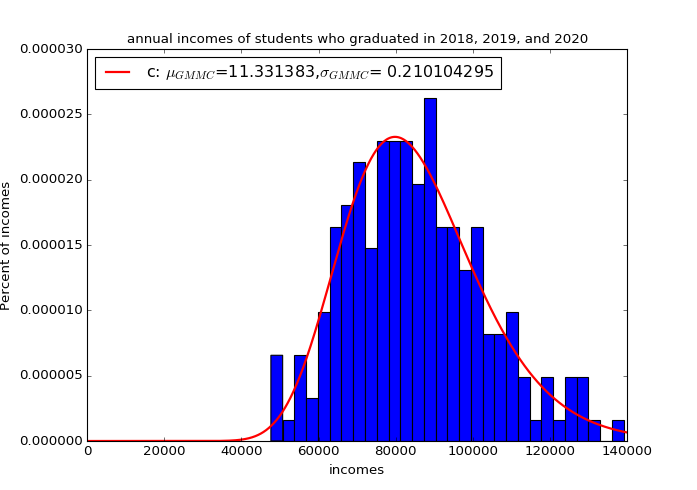

/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in divide
/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in log
/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in multiply


In [193]:
# Plot the histogram of the data
%matplotlib notebook
count, bins, ignored = plt.hist(incomes, 30, normed=True)
plt.title('annual incomes of students who graduated in 2018, 2019, and 2020', fontsize=12)
plt.xlabel('incomes')
plt.ylabel('Percent of incomes')
plt.xlim([0, 140000])  # This gives the xmin and xmax to be plotted"

dist_incomes = np.linspace(0, 140000, 1000)
plt.plot(dist_incomes, LN_pdf(dist_incomes, mu_SMM_C, sig_SMM_C),  linewidth=2, color='r', label='c: $\mu_{GMMC}$=11.331383,$\sigma_{GMMC}$= 0.210104295')
plt.legend(loc='upper left')
plt.show()

# d

In [188]:
np.random.seed(1234)
sim_vals = np.exp(np.random.normal(mu_SMM_C, sig_SMM_C, ((N, S))))
err2_D = err_vec(incomes, sim_vals, False)
VCV2_D = np.dot(err2_D, err2_D.T) * 1.0 / incomes.shape[0]
W_hat2_D = lin.pinv(VCV2_D) 

params_init_D = np.array([mu_SMM_C, sig_SMM_C])
smm_args_D = (incomes, W_hat2_D)
results_D = opt.minimize(criterion, params_init_D, args=(smm_args_D),bounds=((None, None), (1e-10, None)))

answer

In [195]:
mu_SMM_D, sig_SMM_D = results_D.x
np.random.seed(1234)
sim_vals = np.exp(np.random.normal(mu_SMM_D, sig_SMM_D, ((N, S))))
mean_data, std_data= data_moments(incomes)
mean_model_, std_model_ = data_moments(sim_vals)
mean_model, std_model = mean_model_.mean(), std_model_.mean()
print('mu_SMM_D=', mu_SMM_D, ' sig_SMM_D=', sig_SMM_D)
print ('The value of smm criterion function is {0}'.format(results_D.fun[0][0]))
print (('data moments: ({0} {1})').format(mean_data, std_data))
print (('model moments: ({0} {1})').format(mean_model, std_model))
print ("data moments - model moments: {} {}".format(mean_data-mean_model, std_data-std_model))

('mu_SMM_D=', 11.331390186202588, ' sig_SMM_D=', 0.21010428883399743)
The value of smm criterion function is 8.56167953632e-05
data moments: (85276.8236063 17992.542128)
model moments: (85277.3153749 17992.6771507)
data moments - model moments: -0.491768616208 -0.135022645558


<IPython.core.display.Javascript object>


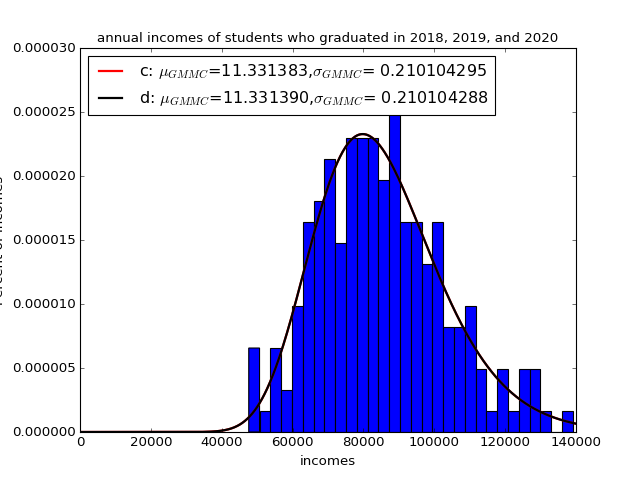

/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in divide
/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in log
/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in multiply


In [191]:
# Plot the histogram of the data
%matplotlib notebook
count, bins, ignored = plt.hist(incomes, 30, normed=True)
plt.title('annual incomes of students who graduated in 2018, 2019, and 2020', fontsize=12)
plt.xlabel('incomes')
plt.ylabel('Percent of incomes')
plt.xlim([0, 140000])  # This gives the xmin and xmax to be plotted"

dist_incomes = np.linspace(0, 140000, 1000)
plt.plot(dist_incomes, LN_pdf(dist_incomes, mu_SMM_C, sig_SMM_C),  linewidth=2, color='r', label='c: $\mu_{GMMC}$=11.331383,$\sigma_{GMMC}$= 0.210104295')
plt.plot(dist_incomes, LN_pdf(dist_incomes, mu_SMM_D, sig_SMM_D),  linewidth=2, color='k', label='d: $\mu_{GMMC}$=11.331390,$\sigma_{GMMC}$= 0.210104288')
plt.legend(loc='upper left')
plt.show()